In [2]:
import alborex_functions
import alborexdata
import netCDF4
import glob
import os
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import numpy as np
import datetime
from importlib import reload

In [3]:
reload(alborexdata)

<module 'alborexdata' from '/home/ctroupin/Publis/201703_AlborexData/python/alborexdata.py'>

In [4]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Configuration

In [5]:
with open('alborexconfig.json') as json_data_file:
    config = json.load(json_data_file)

In [9]:
logger = alborexdata.configure_logging("./logs/alborexFigure3.log")

Domain

In [10]:
coordinates = config["domain"]["coordinates1"]
coordinates2 = config["domain"]["coordinates2"]

In [20]:
figdir = config["figdir"]
datadir = config["datadirs"]["drifters"]
datafilelist = sorted(glob.glob(os.path.join(datadir, "*.nc")))

In [16]:
coastfile = config["datafiles"]["coast"]

# Data reading and plotting

Make figure directory if necessary.

In [13]:
if os.path.isdir(figdir):
    logger.debug("Figure directory {0} already exists".format(figdir))
else:
    os.makedirs(figdir)
    logger.debug("Creating figure directory {0}".format(figdir))

2018-07-26 15:22:55,291 - alborex_logger - DEBUG - Figure directory /home/ctroupin/Publis/201703_AlborexData/figures already exists


## Coastline

In [17]:
if os.path.exists(coastfile):
    logger.info("{0} exists".format(coastfile))
    loncoast, latcoast = alborexdata.read_lonlat_coast(coastfile)
else:
    logger.warning("{0} does't exist".format(coastfile))  

2018-07-26 15:23:38,233 - alborex_logger - INFO - /home/ctroupin/Data/Alborex/Coastline/coastline_f.dat exists


Create the projection

In [18]:
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='h')

In [19]:
mzoom = Basemap(projection='merc', llcrnrlon=-1., llcrnrlat=36,
                urcrnrlon=1., urcrnrlat=37.5,
                lat_ts=36.5, resolution='h')

## Loop on the files

2018-07-26 15:30:55,401 - alborex_logger - INFO - Making figure drifter_temperature


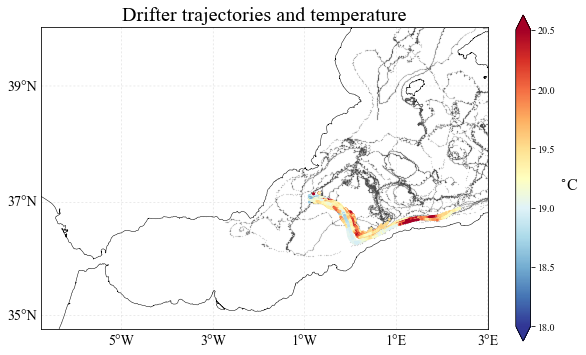

In [23]:
figname = "drifter_temperature"
figtitle = "Drifter trajectories and temperature"
logger.info("Making figure {0}".format(figname))

tmin, tmax = 18., 20.5
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax

# Add the coastline
for i in range(0, len(loncoast)):
    m.plot(np.array(loncoast[i]), np.array(latcoast[i]), 
           color='k', linewidth=.5, latlon=True)

alborexdata.add_map_grid(m, coordinates, dlon=2., dlat=2.,
                         fontname='Times New Roman', fontsize=14, 
                         linewidth=0.2, zorder=1, color=".6")
    
for datafiles in datafilelist:
    
    # logger.debug("Working on file: {0}".format(os.path.basename(datafiles)))
    
    # Read data from file
    drifter = alborexdata.Drifter()
    drifter.get_from_netcdf(datafiles)
        
    # Apply quality flags
    drifter.apply_qc_latlon(QC=[1])

    # Add to plot
    drifter.point_plot(m, marker='o', linestyle=None,
                       color=".3", ms=.1, zorder=3, alpha=.7)    
        
    if drifter.temperature is not None:
        # drifter.mask_temp(tmin, tmax)
        drifter.select_dates(finaldate=datetime.datetime(2014, 6, 1, 0, 0))
        scat = drifter.scatter_plot(m, vmin=tmin, vmax=tmax, s=3,
                                    cmap=plt.cm.RdYlBu_r, zorder=4)
    
cb = plt.colorbar(scat, extend='both', shrink=0.6)
cb.set_label('$^{\circ}$C', rotation=0, ha='left', fontsize=16)

xtext1, ytext1 = m(-3.2, 37.)
xfig1, yfig1 = m(coordinates2[0], coordinates2[2])

plt.title(figtitle, fontsize=20)
plt.show()
# plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches='tight',)
plt.close()

# Plot with limited data in time

2018-07-26 15:30:38,912 - alborex_logger - INFO - Making figure drifter_temperature_closeup
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/numpy/ma/core.py:2163: RuntimeWarning: invalid value encountered in less
  condition = (xf < v1) | (xf > v2)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/numpy/ma/core.py:2163: RuntimeWarning: invalid value encountered in greater
  condition = (xf < v1) | (xf > v2)
2018-07-26 15:30:39,115 - alborex_logger - INFO - /home/ctroupin/Data/Alborex/Drifters/dep0001_drifter-svp020_scb-svp015_L0_2014-05-28.nc
2018-07-26 15:30:39,194 - alborex_logger - INFO - /home/ctroupin/Data/Alborex/Drifters/dep0001_drifter-svp020_scb-svp015_L1_2014-05-28.nc
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/pyproj.py:495: UserWarning: Warning: converting a masked element to nan.
  return array('d',(float(x),)),True,False,False


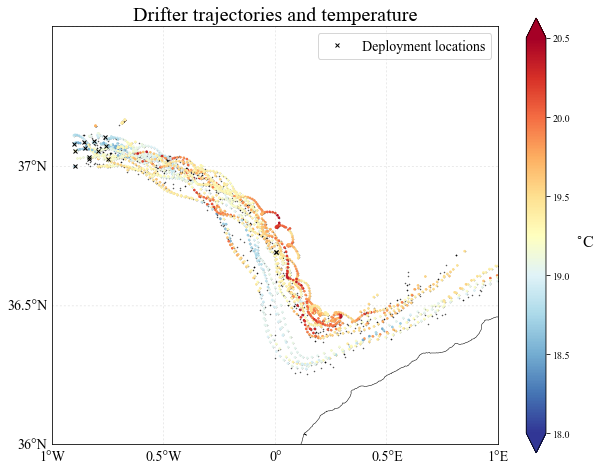

In [22]:
figname = "drifter_temperature_closeup"
figtitle = "Drifter trajectories and temperature"
logger.info("Making figure {0}".format(figname))

tmin, tmax = 18., 20.5
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
mzoom.ax = ax

# Add the coastline
for i in range(0, len(loncoast)):
    mzoom.plot(np.array(loncoast[i]), np.array(latcoast[i]), 
           color='k', linewidth=.5, latlon=True)

alborexdata.add_map_grid(mzoom, coordinates, dlon=.5, dlat=.5,
                         fontname='Times New Roman', fontsize=14, 
                         linewidth=0.2, zorder=1, color=".6")
    
for ii, datafiles in enumerate(datafilelist):
    
    # logger.debug("Working on file: {0}".format(os.path.basename(datafiles)))
    
    # Read data from file
    drifter = alborexdata.Drifter()
    drifter.get_from_netcdf(datafiles)
        
    # Apply quality flags
    drifter.apply_qc_latlon(QC=[1])
    
    # Select mission period
    drifter.select_dates(finaldate=datetime.datetime(2014, 6, 1, 0, 0))

    # Add to plot
    drifter.point_plot(mzoom, marker='o', linestyle=None,
                       color='k', ms=.5, zorder=3, alpha=.7) 
    
    if ii == 0:
        drifter.add_initial_position(mzoom, marker='x',
                                     color='k', ms=4, zorder=6, 
                                     label='Deployment locations')
    else:
        drifter.add_initial_position(mzoom, marker='x',
                                     color='k', ms=4, zorder=6)
    
    plt.legend(loc=1, fontsize=14)
    
    if drifter.lon[0] > -.5:
        logger.info(datafiles)
        
    if drifter.temperature is not None:
        drifter.mask_temp(tmin, tmax)
        scat = drifter.scatter_plot(mzoom, vmin=tmin, vmax=tmax, 
                                    s=2.5, cmap=plt.cm.RdYlBu_r, zorder=4)
    
cb = plt.colorbar(scat, extend='both', shrink=0.8)
cb.set_label('$^{\circ}$C', rotation=0, ha='left', fontsize=16)

plt.title(figtitle, fontsize=20)
plt.show()
# plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches='tight',)
plt.close()